In [1]:
import pandas as pd
import time
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

x_train = train_set.drop(['median_house_value'], axis=1)
y_train = train_set['median_house_value']

x_test = test_set.drop(['median_house_value'], axis=1)
y_test = test_set['median_house_value']

In [3]:
x_train,y_train

(       longitude  latitude  housing_median_age  total_rooms  median_income  \
 0       0.703187  0.058511            0.098039     0.154779       0.323016   
 1       0.546813  0.171277            0.294118     0.038231       0.673198   
 2       0.464143  0.451064            0.078431     0.066312       0.248231   
 3       0.433267  0.678723            0.313725     0.203464       0.239466   
 4       0.723108  0.025532            0.372549     0.055375       0.162977   
 ...          ...       ...                 ...          ...            ...   
 15319   0.583665  0.181915            0.470588     0.213232       0.210328   
 15320   0.201195  0.571277            0.490196     0.098718       0.119322   
 15321   0.874502  0.026596            0.294118     0.033093       0.047268   
 15322   0.250000  0.393617            0.372549     0.024215       0.145481   
 15323   0.223108  0.542553            0.333333     0.110113       0.205942   
 
        <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR 

In [4]:
def dot_product(a,b):
    c=0
    for i in range(len(a)):
        c+=a[i]*b[i]
    return c

def cost(w,b):
    cost=0
    for i in range(len(x_train)):
        cost+=(dot_product(list(x_train.iloc[i]),w)+b-y_train.iloc[i])**2
    return cost/(2*len(x_train))

def derivative_x(w,b,j):
    derivative=0
    for i in range(len(x_train)):
        derivative+=(dot_product(list(x_train.iloc[i]),w)+b-y_train.iloc[i])*(x_train.iloc[i,j])
    return derivative/len(x_train)

def derivative_b(w,b):
    derivative=0
    for i in range(len(x_train)):
        derivative+=(dot_product(list(x_train.iloc[i]),w)+b-y_train.iloc[i])
    return derivative/len(x_train)

def gradient_decent(w,b,lr):
    w_new=w
    b_new=b
    for j in range(len(x_train.iloc[0])):
        w_new[j]=w_new[j]-lr*(derivative_x(w,b,j))
    b_new=b_new-lr*derivative_b(w,b)
    return w_new,b_new

In [5]:
w=[0]*len(x_train.iloc[0])
b=0
cost_list=[]

start = time.time() 
for epoch in range(50):
    w,b=gradient_decent(w,b,1.25)
    if((epoch+1)%5==0):
        print("Epoch : ",epoch+1 ," , Cost : ",cost(w,b))
    cost_list.append(cost(w,b))
end = time.time()
print("Time taken for training in 50 Epoch: ",end-start)

Epoch :  5  , Cost :  3954896058.980401
Epoch :  10  , Cost :  3418686292.33854
Epoch :  15  , Cost :  3183580270.8772674
Epoch :  20  , Cost :  3060394642.0024815
Epoch :  25  , Cost :  2986469783.91874
Epoch :  30  , Cost :  2935294220.451524
Epoch :  35  , Cost :  2895103933.64295
Epoch :  40  , Cost :  2860636621.5807295
Epoch :  45  , Cost :  2829525968.7454104
Epoch :  50  , Cost :  2800693946.070178
Time taken for training in 50 Epoch:  276.3647928237915


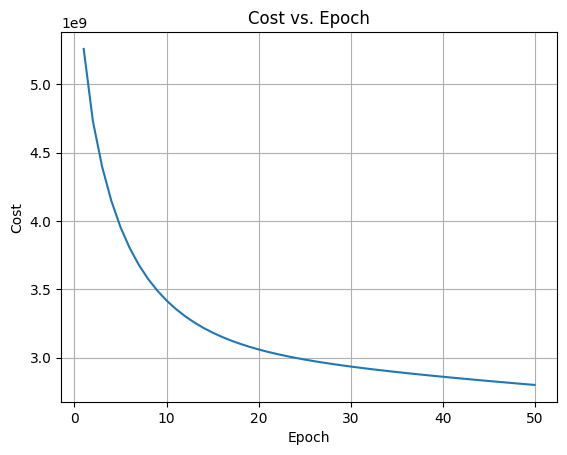

In [13]:
plt.plot(range(1, 51), cost_list)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs. Epoch')
plt.grid(True)
plt.show()

In [10]:
y_hat=[0]*len(x_test)
for i in range(len(x_test)):
    y_hat[i]=dot_product(w,x_test.iloc[i])+b

C:\Users\45rud\AppData\Local\Temp\ipykernel_2700\2769130012.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c+=a[i]*b[i]


In [11]:

print("Mean absolute error:", mean_absolute_error(y_test, y_hat))
print("Mean squared error:", mean_squared_error(y_test, y_hat))
print("R² score:", r2_score(y_test, y_hat))

Mean absolute error: 55356.67257056436
Mean squared error: 5615645138.765068
R² score: 0.589314062323022


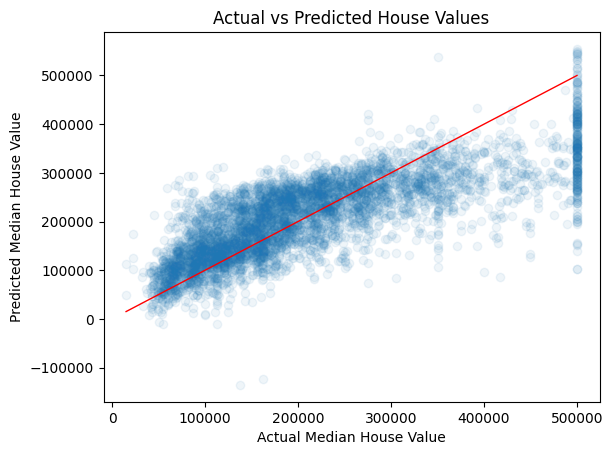

In [12]:


plt.scatter(y_test, y_hat, alpha=0.07)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=1)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.show()